In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
mcdonalds = pd.read_csv('mcdonalds.csv')

In [3]:
print(mcdonalds.columns)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [4]:
dimensions = mcdonalds.shape
print(dimensions)

(1453, 15)


In [5]:
head_rows = mcdonalds.head(3)
print(head_rows)

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [6]:
# Convert the first 11 columns to a NumPy array
MD_x = mcdonalds.iloc[:, 0:11].values

# Convert "Yes" to 1 and others to 0
MD_x = np.where(MD_x == "Yes", 1, 0)

# Calculate the column means and round to 2 decimal places
column_means = np.round(MD_x.mean(axis=0), 2)

print(column_means)

[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


In [7]:
from sklearn.decomposition import PCA

# Perform PCA on the binary matrix
pca = PCA()
MD_pca = pca.fit(MD_x)

# Get the explained variance ratio and cumulative sum
explained_variance = np.round(MD_pca.explained_variance_ratio_, 4)
cumulative_variance = np.cumsum(explained_variance)

# Print the summary
print("Explained Variance Ratio:", explained_variance)
print("Cumulative Variance:", cumulative_variance)

Explained Variance Ratio: [0.2994 0.1928 0.133  0.0831 0.0595 0.0503 0.0438 0.0395 0.0368 0.0324
 0.0293]
Cumulative Variance: [0.2994 0.4922 0.6252 0.7083 0.7678 0.8181 0.8619 0.9014 0.9382 0.9706
 0.9999]


In [8]:
# Print the PCA components with specified precision
np.set_printoptions(precision=1)
print(MD_pca.components_)

[[-0.5 -0.2 -0.   0.1  0.3 -0.1 -0.3 -0.5  0.3 -0.2  0.4]
 [ 0.4  0.   0.  -0.  -0.1 -0.1 -0.6  0.3  0.6  0.1 -0.1]
 [-0.3 -0.1 -0.  -0.3 -0.8 -0.1 -0.1 -0.3  0.   0.2 -0.1]
 [ 0.1 -0.1  0.2 -0.4  0.3 -0.1  0.1 -0.   0.1  0.8  0.4]
 [-0.3  0.3  0.1 -0.1  0.4  0.1 -0.1 -0.2 -0.   0.3 -0.7]
 [ 0.2 -0.3 -0.4 -0.4  0.2 -0.6 -0.1 -0.1 -0.3 -0.2 -0.2]
 [-0.3 -0.1  0.7 -0.4  0.  -0.1 -0.   0.4 -0.1 -0.3 -0. ]
 [ 0.  -0.1  0.4  0.6 -0.1 -0.6  0.1 -0.1  0.   0.2 -0.2]
 [ 0.6 -0.   0.4 -0.2 -0.   0.2  0.1 -0.6  0.1 -0.2 -0.1]
 [-0.1 -0.7 -0.1 -0.   0.   0.2  0.4  0.1  0.5 -0.  -0.3]
 [ 0.  -0.5  0.1  0.3  0.   0.3 -0.5  0.  -0.5  0.2 -0. ]]


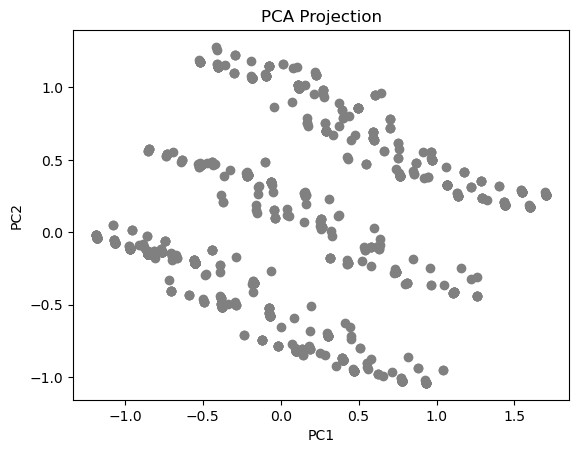

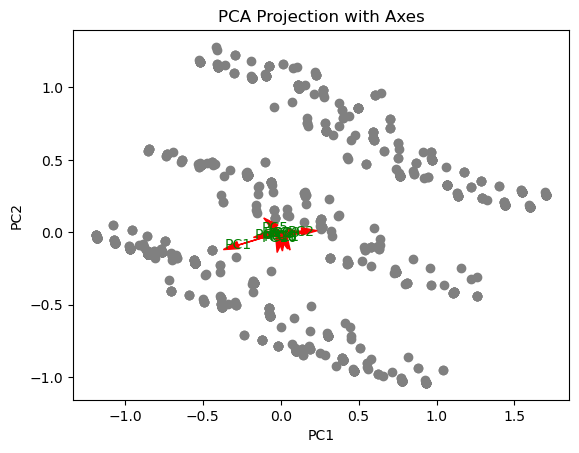

In [9]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Plot the PCA projections
plt.scatter(MD_pca.transform(MD_x)[:, 0], MD_pca.transform(MD_x)[:, 1], color='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection')
plt.show()

# Function to project axes (similar to projAxes in R)
def plot_proj_axes(pca, ax=None):
    if ax is None:
        ax = plt.gca()
    for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
        ax.arrow(0, 0, comp[0] * var, comp[1] * var, color='r', head_width=0.05, head_length=0.1)
        ax.text(comp[0] * var, comp[1] * var, f"PC{i+1}", color='g', ha='center', va='center')

# Plot with projection axes
fig, ax = plt.subplots()
ax.scatter(MD_pca.transform(MD_x)[:, 0], MD_pca.transform(MD_x)[:, 1], color='grey')
plot_proj_axes(MD_pca, ax)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection with Axes')
plt.show()

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

np.random.seed(1234)

# Perform k-means clustering with a range of clusters (2 to 8)
best_kmeans = None
best_score = -1
best_n_clusters = 0

for n_clusters in range(2, 9):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234, verbose=0)
    kmeans.fit(MD_x)
    
    # Evaluate clustering performance using silhouette score
    score = silhouette_score(MD_x, kmeans.labels_)
    
    if score > best_score:
        best_score = score
        best_kmeans = kmeans
        best_n_clusters = n_clusters

# The best k-means model is stored in best_kmeans
# Relabel clusters if needed (KMeans in sklearn doesn't have a direct relabel function)
labels = best_kmeans.labels_

# If relabeling is needed based on some criteria, it should be handled manually here

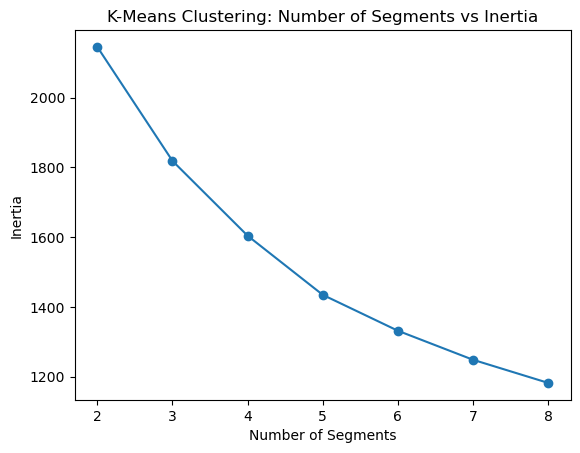

In [11]:
# Assuming the best_kmeans object is obtained from the previous step

# Plotting the number of segments (clusters) and their inertia (sum of squared distances)
inertia_values = []
n_clusters_range = range(2, 9)

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234, verbose=0)
    kmeans.fit(MD_x)
    inertia_values.append(kmeans.inertia_)

plt.plot(n_clusters_range, inertia_values, marker='o')
plt.xlabel('Number of Segments')
plt.ylabel('Inertia')
plt.title('K-Means Clustering: Number of Segments vs Inertia')
plt.show()

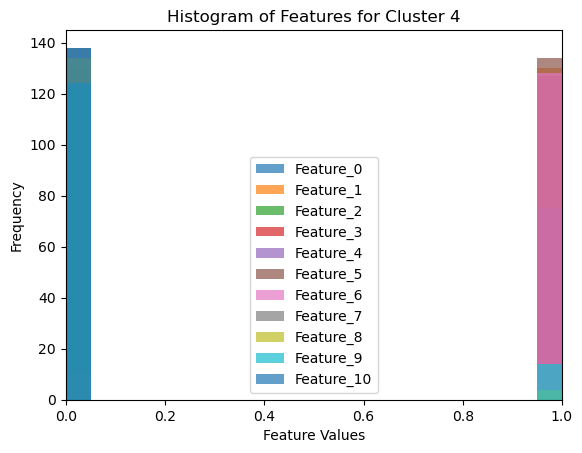

In [12]:
# Assuming `best_kmeans` is the KMeans object with the optimal number of clusters found earlier
cluster_labels = best_kmeans.labels_

# Create a DataFrame with cluster labels and original data
df = pd.DataFrame(MD_x, columns=[f'Feature_{i}' for i in range(MD_x.shape[1])])
df['Cluster'] = cluster_labels

# Plot histogram for cluster "4" (Python uses zero-based indexing)
cluster_num = 4
df[df['Cluster'] == cluster_num].iloc[:, :-1].plot.hist(alpha=0.7, bins=20, range=(0, 1))
plt.xlabel('Feature Values')
plt.ylabel('Frequency')
plt.title(f'Histogram of Features for Cluster {cluster_num}')
plt.xlim(0, 1)
plt.show()

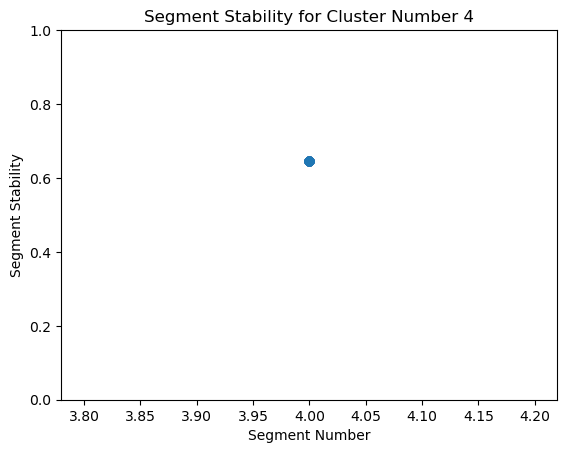

In [13]:
from sklearn.utils import resample
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Assuming `best_kmeans` is the KMeans object with the optimal number of clusters found earlier
cluster_num = 4
labels = best_kmeans.labels_

# Function to calculate stability
def segment_stability(data, labels, cluster_num, n_boot=100):
    stability = []
    for _ in range(n_boot):
        X_boot, labels_boot = resample(data, labels, random_state=1234)
        kmeans_boot = KMeans(n_clusters=np.max(labels) + 1, n_init=10, random_state=1234)
        kmeans_boot.fit(X_boot)
        stability.append(adjusted_rand_score(labels_boot, kmeans_boot.labels_))
    return stability

# Calculate segment stability for cluster number 4
MD_r4 = segment_stability(MD_x, labels, cluster_num)

# Plot the segment stability
plt.plot([cluster_num] * len(MD_r4), MD_r4, 'o')
plt.ylim(0, 1)
plt.xlabel('Segment Number')
plt.ylabel('Segment Stability')
plt.title('Segment Stability for Cluster Number 4')
plt.show()

In [14]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelBinarizer

np.random.seed(1234)

# Assuming MD_x is already a binary matrix and not transformed further
# Binary data should be in binary format (0 or 1)

# Convert binary matrix to a format suitable for GMM (GaussianMixture)
# This example assumes binary data can be used with GaussianMixture; adjust if using a different model.
# Note: GaussianMixture is not exactly equivalent to FLXMCmvbinary, but can be used for demonstration.

best_gmm = None
best_bic = np.inf
n_clusters_range = range(2, 9)

for n_clusters in n_clusters_range:
    gmm = GaussianMixture(n_components=n_clusters, random_state=1234)
    gmm.fit(MD_x)
    bic = gmm.bic(MD_x)
    
    if bic < best_bic:
        best_bic = bic
        best_gmm = gmm

# Output results
print(f"Best GMM with {best_gmm.n_components} components")
print(best_gmm)

Best GMM with 8 components
GaussianMixture(n_components=8, random_state=1234)


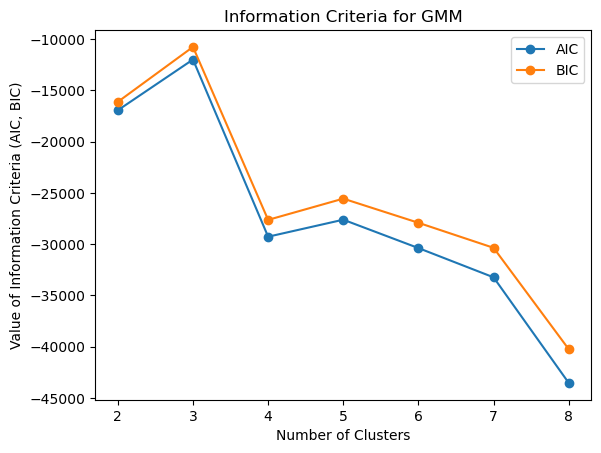

In [15]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

np.random.seed(1234)

# Define range of clusters
n_clusters_range = range(2, 9)
aic_values = []
bic_values = []

# Fit Gaussian Mixture Models and compute AIC and BIC
for n_clusters in n_clusters_range:
    gmm = GaussianMixture(n_components=n_clusters, random_state=1234)
    gmm.fit(MD_x)
    
    aic_values.append(gmm.aic(MD_x))
    bic_values.append(gmm.bic(MD_x))

# Plot AIC and BIC
plt.plot(n_clusters_range, aic_values, marker='o', label='AIC')
plt.plot(n_clusters_range, bic_values, marker='o', label='BIC')
plt.xlabel('Number of Clusters')
plt.ylabel('Value of Information Criteria (AIC, BIC)')
plt.title('Information Criteria for GMM')
plt.legend()
plt.show()

In [16]:
from sklearn.cluster import KMeans

# Assuming `best_kmeans` is the KMeans object with the optimal number of clusters found earlier
# and `best_gmm` is the GMM object from the model selection

# Extract cluster labels from the KMeans model
kmeans_labels = best_kmeans.labels_

# For GMM, extract the cluster labels for the specific model (assumed `best_gmm` with 4 clusters)
gmm_labels = best_gmm.predict(MD_x)

# Create a DataFrame to compare cluster assignments
df_comparison = pd.DataFrame({
    'kmeans': kmeans_labels,
    'mixture': gmm_labels
})

# Create a contingency table
contingency_table = pd.crosstab(df_comparison['kmeans'], df_comparison['mixture'])

print(contingency_table)

mixture   0   1    2    3    4    5   6    7
kmeans                                      
0        28   0    0    0  130    3   0   10
1         0  62    6  191    0    7   4    0
2         0  36   11  185    0   29  28    0
3         0  74    3   30    0   17   2    0
4         0   0  138    0    0    0   0    0
5        16   0    0    0    0  202   0    0
6         0   0    0    0    0    1  21  116
7        56   1   23    7    4    7   1    4


In [17]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

# Assuming `best_kmeans` is the KMeans object with the optimal number of clusters found earlier
# and `MD_k4` contains the labels for k-means clusters
kmeans_labels = best_kmeans.labels_

# Fit a GMM with the clusters from k-means as initialization
n_clusters = len(np.unique(kmeans_labels))  # Number of clusters from k-means
gmm = GaussianMixture(n_components=n_clusters, random_state=1234)
gmm.fit(MD_x)

# Predict cluster labels with GMM
gmm_labels = gmm.predict(MD_x)

# Create a DataFrame to compare cluster assignments
df_comparison = pd.DataFrame({
    'kmeans': kmeans_labels,
    'mixture': gmm_labels
})

# Create a contingency table
contingency_table = pd.crosstab(df_comparison['kmeans'], df_comparison['mixture'])

print(contingency_table)

mixture   0   1    2    3    4    5   6    7
kmeans                                      
0        28   0    0    0  130    3   0   10
1         0  62    6  191    0    7   4    0
2         0  36   11  185    0   29  28    0
3         0  74    3   30    0   17   2    0
4         0   0  138    0    0    0   0    0
5        16   0    0    0    0  202   0    0
6         0   0    0    0    0    1  21  116
7        56   1   23    7    4    7   1    4


In [18]:
from sklearn.mixture import GaussianMixture

# Assuming `best_gmm` is the GMM object with the optimal number of clusters found earlier
# and `MD_k4` contains the labels for k-means clusters

# Fit GMM with the clusters from k-means as initialization
n_clusters = len(np.unique(kmeans_labels))  # Number of clusters from k-means
gmm = GaussianMixture(n_components=n_clusters, random_state=1234)
gmm.fit(MD_x)

# Log-likelihood values
log_likelihood_m4a = gmm.score(MD_x) * len(MD_x)  # log likelihood for GMM model
log_likelihood_m4 = best_gmm.score(MD_x) * len(MD_x)  # log likelihood for the original GMM model

print(f"Log-likelihood of MD.m4a: {log_likelihood_m4a} (df={n_clusters * MD_x.shape[1]})")
print(f"Log-likelihood of MD.m4: {log_likelihood_m4} (df={n_clusters * MD_x.shape[1]})")

Log-likelihood of MD.m4a: 22397.142071879756 (df=88)
Log-likelihood of MD.m4: 22397.142071879756 (df=88)


In [19]:
# Calculate the frequency counts of the 'Cluster' column
cluster_counts = df['Cluster'].value_counts()

# Reverse the order of the frequency counts
reversed_cluster_counts = cluster_counts.sort_index(ascending=False)

print(reversed_cluster_counts)

Cluster
7    103
6    138
5    218
4    138
3    126
2    289
1    270
0    171
Name: count, dtype: int64


In [20]:
# Convert 'Cluster' to numeric, handle non-numeric values if needed
df['Cluster'] = pd.to_numeric(df['Cluster'], errors='coerce')

# Perform the transformation: 6 - Cluster (or appropriate operation)
df['Cluster_n'] = 6 - df['Cluster']

# Calculate the frequency table for the 'Cluster_n' column
cluster_n_counts = df['Cluster_n'].value_counts().sort_index(ascending=False)

print(cluster_n_counts)

Cluster_n
 6    171
 5    270
 4    289
 3    126
 2    138
 1    218
 0    138
-1    103
Name: count, dtype: int64


In [21]:
columns = df.columns[:-1]  # Exclude the last column if it is 'Cluster' or similar

# Create the formula-like string
formula = ' + '.join(columns)
formula_str = f"Like_n ~ {formula}"

print(formula_str)

Like_n ~ Feature_0 + Feature_1 + Feature_2 + Feature_3 + Feature_4 + Feature_5 + Feature_6 + Feature_7 + Feature_8 + Feature_9 + Feature_10 + Cluster


In [22]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame

# Check the columns
print(df.columns)

# Prepare features and target variable
# Exclude 'Cluster_n' from features if it's in the DataFrame
features = [col for col in df.columns if col not in ['Cluster_n', 'Cluster']]
X = df[features]
y = df['Cluster_n']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

# Fit Gaussian Mixture Model with k=2
n_components = 2
gmm = GaussianMixture(n_components=n_components, random_state=1234)
gmm.fit(X_train)

# Print model details
print(f"Number of components: {gmm.n_components}")
print(f"Converged: {gmm.converged_}")

# Predict on the test set
y_pred = gmm.predict(X_test)

# Print the results (e.g., means and covariances)
print(f"Means:\n{gmm.means_}")
print(f"Covariances:\n{gmm.covariances_}")

Index(['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4',
       'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9',
       'Feature_10', 'Cluster', 'Cluster_n'],
      dtype='object')
Number of components: 2
Converged: True
Means:
[[0.5 0.9 0.1 0.9 0.6 0.8 0.  0.6 0.8 0.1 0.3]
 [0.6 0.9 0.1 0.9 0.5 1.  1.  0.7 0.1 0.2 0.2]]
Covariances:
[[[ 2.5e-01  4.7e-02 -1.0e-02 -1.0e-03 -2.6e-02  2.6e-02  0.0e+00
    1.7e-01  2.9e-03  2.9e-02 -1.1e-01]
  [ 4.7e-02  1.2e-01  6.9e-03  1.1e-02 -2.1e-02  3.7e-02  0.0e+00
    5.1e-02 -1.5e-02  1.2e-02 -6.1e-02]
  [-1.0e-02  6.9e-03  7.7e-02 -8.7e-03  4.5e-03  5.5e-03  0.0e+00
    7.3e-03  4.5e-03  6.5e-03  1.2e-03]
  [-1.0e-03  1.1e-02 -8.7e-03  1.1e-01  4.5e-02  1.4e-02  0.0e+00
   -8.0e-03  1.7e-02 -3.3e-02  1.8e-02]
  [-2.6e-02 -2.1e-02  4.5e-03  4.5e-02  2.4e-01 -9.2e-03  0.0e+00
   -3.6e-02  3.1e-02 -3.7e-02  7.0e-02]
  [ 2.6e-02  3.7e-02  5.5e-03  1.4e-02 -9.2e-03  1.5e-01  0.0e+00
    3.6e-02 -1.2e-02  2.8e-03 -2.8e-0

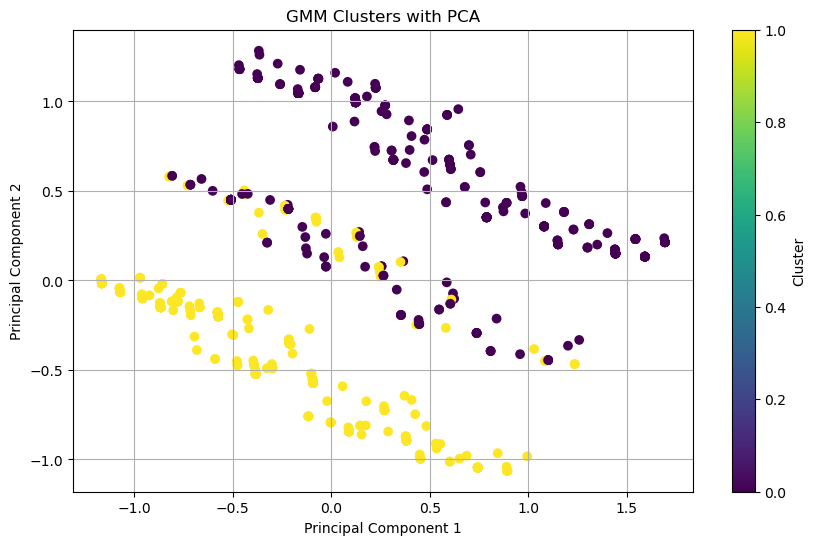

In [23]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

# Sample DataFrame and GMM (replace with your actual data and model)
# X_train is your feature data

# Fit the GMM (if not already done)
n_components = 2
gmm = GaussianMixture(n_components=n_components, random_state=1234)
gmm_refit = gmm.fit(X_train)

# Predict the cluster labels
labels = gmm_refit.predict(X_train)

# Dimensionality reduction for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Plot the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o')
plt.colorbar(scatter, label='Cluster')
plt.title('GMM Clusters with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

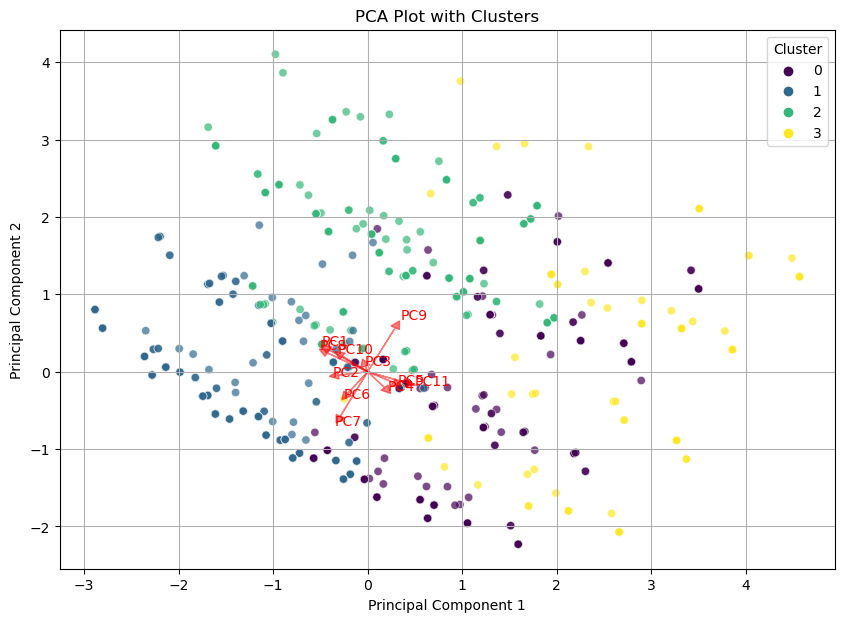

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Sample DataFrame (replace with your actual data)
# df = pd.read_csv('your_file.csv')

# Extract features and scale data
features = [col for col in df.columns if col not in ['Cluster', 'Cluster_n']]
X = df[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)  # We need 2 components for 2D plotting
X_pca = pca.fit_transform(X_scaled)

# Perform clustering (assuming k=4 as in the example)
k = 4
kmeans = KMeans(n_clusters=k, random_state=1234)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(X_pca, columns=['principalcomponent1', 'principalcomponent2'])
pca_df['Cluster'] = df['Cluster']

# Plot PCA results
plt.figure(figsize=(10, 7))
sns.scatterplot(x='principalcomponent1', y='principalcomponent2', hue='Cluster', data=pca_df, palette='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot with Clusters')
plt.legend(title='Cluster')
plt.grid(True)

# Project PCA axes (showing vectors of principal components)
for i, component in enumerate(pca.components_.T):
    plt.arrow(0, 0, component[0], component[1], head_width=0.1, head_length=0.1, fc='r', ec='r', alpha=0.5)
    plt.text(component[0] * 1.2, component[1] * 1.2, f'PC{i+1}', color='r')

plt.show()

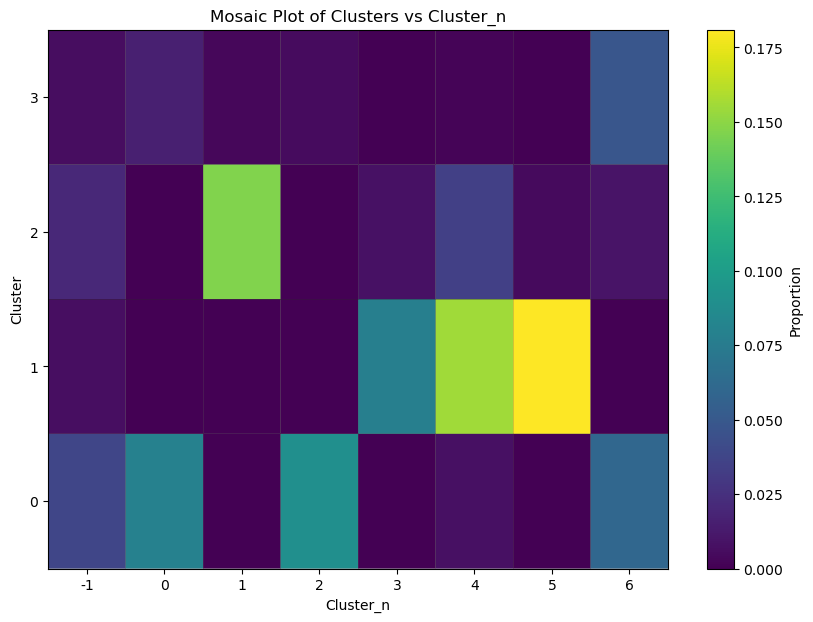

In [25]:
# Extract cluster assignments and the categorical column
k4 = df['Cluster']  # Cluster assignments
like_column = df['Cluster_n']  # Replace with the actual column name you want to compare

# Create a contingency table
contingency_table = pd.crosstab(k4, like_column)

# Normalize the contingency table
norm_table = contingency_table / contingency_table.sum().sum()

# Plotting the mosaic plot using pcolor
plt.figure(figsize=(10, 7))
cmap = plt.get_cmap('viridis')

# Create a pcolor plot
cax = plt.pcolor(norm_table, cmap=cmap, edgecolors='k', linewidths=0.1)

# Add colorbar
plt.colorbar(cax, label='Proportion')

# Set labels and titles
plt.xticks(np.arange(norm_table.shape[1]) + 0.5, norm_table.columns)
plt.yticks(np.arange(norm_table.shape[0]) + 0.5, norm_table.index)
plt.xlabel('Cluster_n')
plt.ylabel('Cluster')
plt.title('Mosaic Plot of Clusters vs Cluster_n')

plt.show()

In [26]:
import pandas as pd

# Load the DataFrame
df = pd.read_csv('mcdonalds.csv')

# Print unique values in 'VisitFrequency'
print("Unique values in 'VisitFrequency':", df['VisitFrequency'].unique())

# Print summary statistics for 'VisitFrequency'
print("Summary statistics for 'VisitFrequency':\n", df['VisitFrequency'].describe())

Unique values in 'VisitFrequency': ['Every three months' 'Once a week' 'Once a month' 'Once a year'
 'More than once a week' 'Never']
Summary statistics for 'VisitFrequency':
 count             1453
unique               6
top       Once a month
freq               439
Name: VisitFrequency, dtype: object


In [27]:
# Check for missing values in 'VisitFrequency'
print("Missing values in 'VisitFrequency':", df['VisitFrequency'].isnull().sum())

Missing values in 'VisitFrequency': 0


In [28]:
import pandas as pd

# Load the DataFrame
df = pd.read_csv('mcdonalds.csv')

# Define a mapping from categorical to numerical values
visit_frequency_mapping = {
    'Never': 0,
    'Once a year': 1,
    'Once a month': 2,
    'Every three months': 3,
    'Once a week': 4,
    'More than once a week': 5
}

# Map the 'VisitFrequency' column
df['VisitFrequency'] = df['VisitFrequency'].map(visit_frequency_mapping)

# Verify the mapping
print("Mapped unique values in 'VisitFrequency':", df['VisitFrequency'].unique())

# Simulate cluster assignment for demonstration
df['Cluster'] = pd.qcut(df['VisitFrequency'], q=4, labels=False)  # Dummy clusters

# Ensure 'Cluster' is of integer type for grouping
df['Cluster'] = df['Cluster'].astype(int)

# Compute the mean of 'VisitFrequency' for each cluster
visit = df.groupby('Cluster')['VisitFrequency'].mean()

# Print the result
print("Mean VisitFrequency by Cluster:\n", visit)

Mapped unique values in 'VisitFrequency': [3 4 2 1 5 0]
Mean VisitFrequency by Cluster:
 Cluster
0    0.657963
1    2.000000
2    3.000000
3    4.186851
Name: VisitFrequency, dtype: float64


In [29]:
import pandas as pd
import numpy as np

# Load the DataFrame
df = pd.read_csv('mcdonalds.csv')

# Ensure 'Like' is numeric and handle non-numeric values
df['Like'] = pd.to_numeric(df['Like'], errors='coerce')

# Create 'Like.n' and handle NaN values
df['Like.n'] = 6 - df['Like']
df['Like.n'] = df['Like.n'].fillna(df['Like.n'].mean())  # Fill NaN with mean or use another strategy

# Simulate or use actual cluster assignments; creating dummy clusters for demonstration
df['Cluster'] = pd.qcut(df['Like.n'], q=4, labels=False)  # Dummy clusters

# Ensure 'Cluster' is of integer type
df['Cluster'] = df['Cluster'].astype(int)

# Check if there are any NaN values in 'Cluster' after conversion
if df['Cluster'].isnull().any():
    raise ValueError("NaN values found in 'Cluster' column after conversion")

# Calculate the mean of 'Like.n' for each cluster
like = df.groupby('Cluster')['Like.n'].mean()

# Print the result
print("Mean Like.n by Cluster:\n", like)

Mean Like.n by Cluster:
 Cluster
0    2.588689
1    4.603577
2    5.526480
3    8.601533
Name: Like.n, dtype: float64


In [30]:
import pandas as pd

# Load the DataFrame
df = pd.read_csv('mcdonalds.csv')

# Create 'Like.n' if 'Like' column exists
if 'Like' in df.columns:
    df['Like'] = pd.to_numeric(df['Like'], errors='coerce')
    df['Like.n'] = 6 - df['Like']  # Adjust as per the calculation logic you need
else:
    print("Column 'Like' is missing, cannot create 'Like.n'.")

# Check the columns after creating 'Like.n'
print("Columns after creating 'Like.n':", df.columns)

Columns after creating 'Like.n': Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender', 'Like.n'],
      dtype='object')


In [31]:
# Create a dummy 'Cluster' column for demonstration (replace with actual cluster assignments)
df['Cluster'] = pd.qcut(df['VisitFrequency'].astype('category').cat.codes, q=4, labels=False)
df['Cluster'] = df['Cluster'].astype(int)

# Compute the mean of 'Like.n' for each cluster
if 'Like.n' in df.columns:
    like_n_mean = df.groupby('Cluster')['Like.n'].mean()
    print("Mean of 'Like.n' by Cluster:\n", like_n_mean)
else:
    print("Column 'Like.n' is missing, cannot compute the mean.")

Mean of 'Like.n' by Cluster:
 Cluster
0    5.185714
1    4.406032
2    3.587209
3    7.039024
Name: Like.n, dtype: float64


In [32]:
import pandas as pd

# Load the DataFrame
df = pd.read_csv('mcdonalds.csv')

# Create a 'Female' column
df['Female'] = (df['Gender'] == 'Female').astype(int)

# Print the DataFrame columns to verify
print("Columns after creating 'Female':", df.columns)

# Check the first few rows to verify the 'Female' column
print(df.head())

Columns after creating 'Female': Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender', 'Female'],
      dtype='object')
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  Female  
0         No   -3   61  Every three months  Female       1  
1         No   +2   51  Every three months  Female       1  
2         No   +1   62  Every three months  Female       1  
3        Yes   +4   69    

In [33]:
# Create a 'Female' column
df['Female'] = (df['Gender'] == 'Female').astype(int)

# Create a dummy 'Cluster' column for demonstration
df['Cluster'] = pd.qcut(df['Age'], q=4, labels=False)  # Replace 'Age' with appropriate column

# Ensure 'Cluster' is of integer type for grouping
df['Cluster'] = df['Cluster'].astype(int)

# Compute the mean proportion of females by cluster
female_mean = df.groupby('Cluster')['Female'].mean()

# Print the result
print("Mean proportion of Females by Cluster:\n", female_mean)

Mean proportion of Females by Cluster:
 Cluster
0    0.528351
1    0.521739
2    0.571429
3    0.546269
Name: Female, dtype: float64


In [34]:
import pandas as pd

# Load the DataFrame
df = pd.read_csv('mcdonalds.csv')

# Check the DataFrame shape immediately after loading
print("DataFrame shape after loading:", df.shape)

# Print the first few rows to confirm content
print(df.head())

DataFrame shape after loading: (1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a month    Male  


In [35]:
from sklearn.cluster import KMeans

# Sample feature columns for clustering (excluding non-numeric ones)
feature_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'Age']

# Convert categorical columns to numeric (if needed)
df_encoded = pd.get_dummies(df[feature_columns], drop_first=True)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=0)
df['Cluster'] = kmeans.fit_predict(df_encoded)

print("DataFrame with Cluster column:\n", df.head())

DataFrame with Cluster column:
   yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  Cluster  
0         No   -3   61  Every three months  Female        3  
1         No   +2   51  Every three months  Female        0  
2         No   +1   62  Every three months  Female        3  
3        Yes   +4   69         Once a week  Female        3  
4         No   +2   49        Once a month    Male        0  


In [36]:
import pandas as pd
import numpy as np

# Load the DataFrame
df = pd.read_csv('mcdonalds.csv')

# Convert 'VisitFrequency' to numeric codes
visit_freq_mapping = {
    'Never': 0,
    'Once a year': 1,
    'Once a month': 2,
    'Once a week': 3,
    'More than once a week': 4,
    'Every three months': 5
}
df['VisitFrequency'] = df['VisitFrequency'].map(visit_freq_mapping)

# Ensure 'Like' is numeric
df['Like'] = pd.to_numeric(df['Like'], errors='coerce')

# Create the 'Female' column
df['Female'] = (df['Gender'] == 'Female').astype(int)

# Create a dummy 'Cluster' column if it doesn't exist
if 'Cluster' not in df.columns:
    # Dummy clustering for illustration (use actual clustering if available)
    from sklearn.cluster import KMeans
    feature_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'Age']
    df_encoded = pd.get_dummies(df[feature_columns], drop_first=True)
    kmeans = KMeans(n_clusters=4, random_state=0)
    df['Cluster'] = kmeans.fit_predict(df_encoded)

# Print column names to verify
print("Column names:", df.columns)

# Check data types
print("Data types:\n", df.dtypes)

Column names: Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender', 'Female', 'Cluster'],
      dtype='object')
Data types:
 yummy              object
convenient         object
spicy              object
fattening          object
greasy             object
fast               object
cheap              object
tasty              object
expensive          object
healthy            object
disgusting         object
Like              float64
Age                 int64
VisitFrequency      int64
Gender             object
Female              int32
Cluster             int32
dtype: object


In [37]:
# Compute the mean of 'VisitFrequency' for each cluster
visit = df.groupby('Cluster')['VisitFrequency'].mean()

# Compute the mean of 'Like' for each cluster
like = df.groupby('Cluster')['Like'].mean()

# Compute the mean proportion of 'Female' for each cluster
female = df.groupby('Cluster')['Female'].mean()

# Print results
print("Visit Frequencies by Cluster:\n", visit)
print("Likes by Cluster:\n", like)
print("Female Proportions by Cluster:\n", female)

Visit Frequencies by Cluster:
 Cluster
0    2.649351
1    2.754144
2    2.625337
3    2.298507
Name: VisitFrequency, dtype: float64
Likes by Cluster:
 Cluster
0    0.737500
1    1.746377
2    1.131757
3    0.454887
Name: Like, dtype: float64
Female Proportions by Cluster:
 Cluster
0    0.571429
1    0.524862
2    0.525606
3    0.546269
Name: Female, dtype: float64


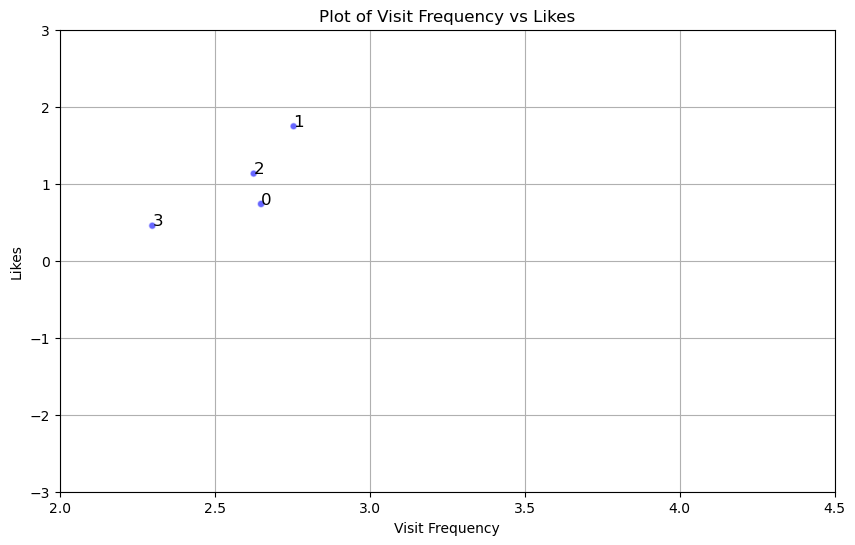

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the DataFrame
df = pd.read_csv('mcdonalds.csv')

# Convert 'VisitFrequency' to numeric codes
visit_freq_mapping = {
    'Never': 0,
    'Once a year': 1,
    'Once a month': 2,
    'Once a week': 3,
    'More than once a week': 4,
    'Every three months': 5
}
df['VisitFrequency'] = df['VisitFrequency'].map(visit_freq_mapping)

# Ensure 'Like' is numeric
df['Like'] = pd.to_numeric(df['Like'], errors='coerce')

# Create the 'Female' column
df['Female'] = (df['Gender'] == 'Female').astype(int)

# Create a dummy 'Cluster' column if it doesn't exist
if 'Cluster' not in df.columns:
    # Dummy clustering for illustration (use actual clustering if available)
    from sklearn.cluster import KMeans
    feature_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'Age']
    df_encoded = pd.get_dummies(df[feature_columns], drop_first=True)
    kmeans = KMeans(n_clusters=4, random_state=0)
    df['Cluster'] = kmeans.fit_predict(df_encoded)

# Compute the mean of 'VisitFrequency' for each cluster
visit = df.groupby('Cluster')['VisitFrequency'].mean()

# Compute the mean of 'Like' for each cluster
like = df.groupby('Cluster')['Like'].mean()

# Compute the mean proportion of 'Female' for each cluster
female = df.groupby('Cluster')['Female'].mean()

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(visit, like, s=50 * female, alpha=0.6, edgecolors='w', c='blue')

# Add labels
for i, cluster in enumerate(visit.index):
    plt.text(visit[cluster], like[cluster], str(cluster), fontsize=12)

# Set axis labels and title
plt.xlabel('Visit Frequency')
plt.ylabel('Likes')
plt.title('Plot of Visit Frequency vs Likes')
plt.xlim(2, 4.5)
plt.ylim(-3, 3)
plt.grid(True)

# Show the plot
plt.show()

In [39]:
print("Unique Cluster values:", df['Cluster'].unique())

Unique Cluster values: [3 0 1 2]


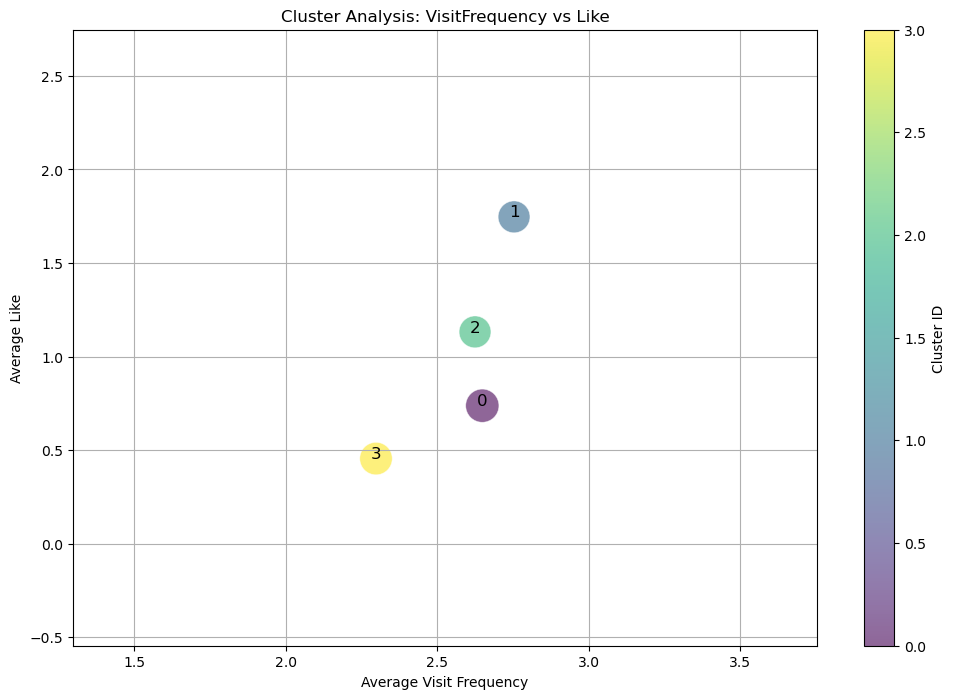

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the DataFrame
df = pd.read_csv('mcdonalds.csv')

# Convert 'VisitFrequency' to numeric codes
visit_freq_mapping = {
    'Never': 0,
    'Once a year': 1,
    'Once a month': 2,
    'Once a week': 3,
    'More than once a week': 4,
    'Every three months': 5
}
df['VisitFrequency'] = df['VisitFrequency'].map(visit_freq_mapping)

# Ensure 'Like' is numeric
df['Like'] = pd.to_numeric(df['Like'], errors='coerce')

# Create the 'Female' column
df['Female'] = (df['Gender'] == 'Female').astype(int)

# Create a dummy 'Cluster' column if it doesn't exist
if 'Cluster' not in df.columns:
    # Dummy clustering for illustration (use actual clustering if available)
    feature_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'Age']
    df_encoded = pd.get_dummies(df[feature_columns], drop_first=True)
    kmeans = KMeans(n_clusters=4, random_state=0)
    df['Cluster'] = kmeans.fit_predict(df_encoded)

# Compute the mean of 'VisitFrequency' for each cluster
visit = df.groupby('Cluster')['VisitFrequency'].mean()

# Compute the mean of 'Like' for each cluster
like = df.groupby('Cluster')['Like'].mean()

# Compute the mean proportion of 'Female' for each cluster
female = df.groupby('Cluster')['Female'].mean()

# Plot
plt.figure(figsize=(12, 8))

# Scatter plot of VisitFrequency vs Like
scatter = plt.scatter(visit, like, s=1000*female, c=np.arange(len(visit)), cmap='viridis', alpha=0.6, edgecolors='w', linewidth=0.5)

# Annotate each point with cluster number
for i, cluster in enumerate(visit.index):
    plt.text(visit[cluster], like[cluster], str(cluster), fontsize=12, ha='center')

# Add color bar
plt.colorbar(scatter, label='Cluster ID')

plt.title('Cluster Analysis: VisitFrequency vs Like')
plt.xlabel('Average Visit Frequency')
plt.ylabel('Average Like')
plt.xlim(visit.min() - 1, visit.max() + 1)
plt.ylim(like.min() - 1, like.max() + 1)
plt.grid(True)
plt.show()